In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, Birch

In [18]:
train_data_enc = pd.read_csv("data/train_data_recipes_encoded.csv")

In [19]:
wcss = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train_data_enc)
    wcss.append(kmeans.inertia_)

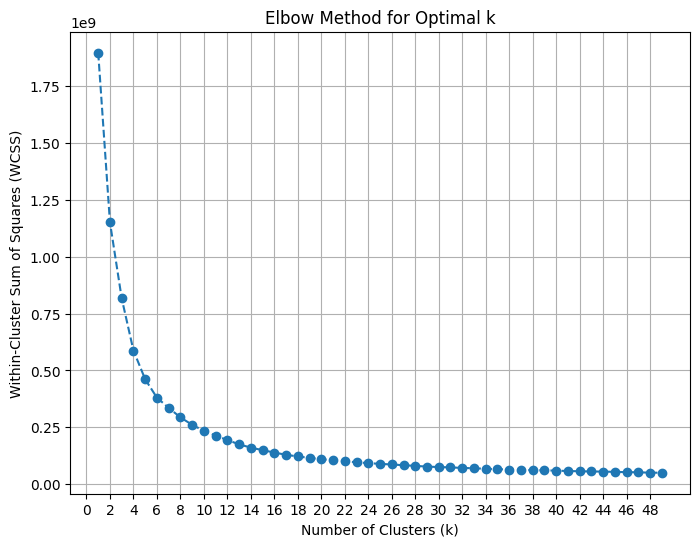

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(0, 50, step=2))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()

In [24]:
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=None)

birch.fit(train_data_enc)

birch.root_

In [25]:
def print_tree(node, depth=0):
    if node is not None:
        indent = "  " * depth
        print(f"{indent}Node - NCF: {node.n_node_samples}, IS: {node.intra_cluster_variance:.2f}")
        for child in node.child_:
            print_tree(child, depth + 1)

# Print the CF Tree structure starting from the root
print_tree(birch.root_)

AttributeError: '_CFNode' object has no attribute 'n_node_samples'